# SPLEX TME 9 - Dimensionality Reduction, Principal Component Analysis

The goal of the TME is to understand how to perform dimensionality reduction and, in particular, get skills to use Principal Component Analysis.

## Data (both data sets are provided)

- Molecular classification of leukemia data set of Golub et al. 1999 contains gene expressions of 72 patients and 3562 genes.
- Breast cancer data set 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Analysis on Breast Cancer dataset

 Repeat the same analyses for the two data sets.
To read the data:

## 1.  Perform PCA to cluster the observations
Note: fix the number of components = 2 in order to visualize the clustering in 2-D (or fix it to 3, and plot it in 3-D)
Here is a simple example how to do it

### PCA on breast cancer

- For the Breast cancer data

In [2]:
X = pd.read_csv("Breast.txt",sep=" ")
y = X.values[:,30] # Classes
X = X.values[:,0:29] # Observations

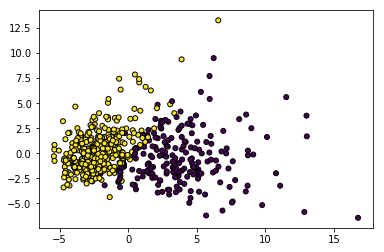

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1],marker="o", c=y,s=25, edgecolor="k")

## 2.  Perform and visualize the results of the kernel PCA

http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

In [4]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

X.shape, y.shape

((568, 29), (568,))

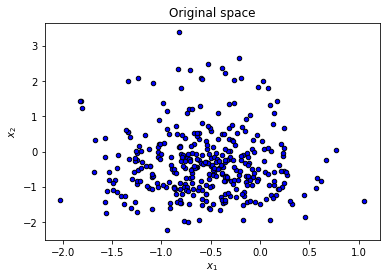

In [5]:
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [6]:
mesh, _ = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
mesh.shape

(50, 50)

In [7]:
X_grid = np.array([np.ravel(mesh)] * 29).T
X_grid.shape

(2500, 29)

In [8]:
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(mesh.shape)

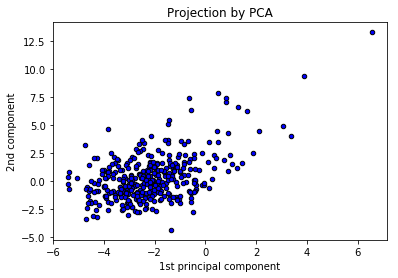

In [9]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.show()

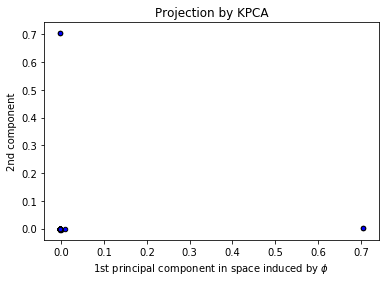

In [10]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.show()

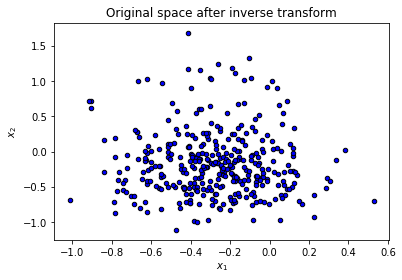

In [11]:
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## 3.  Test an incremental PCA which is used if a data set is too big to be fitted into the memory

https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html

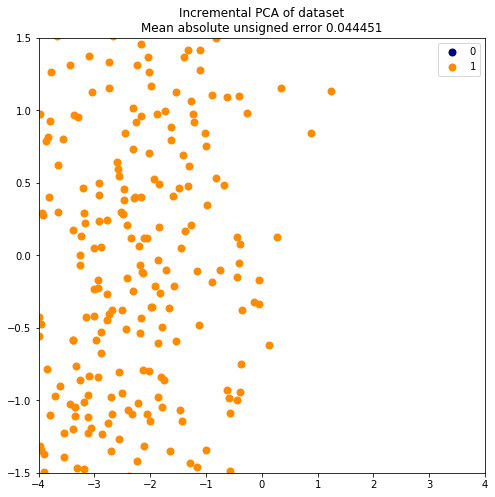

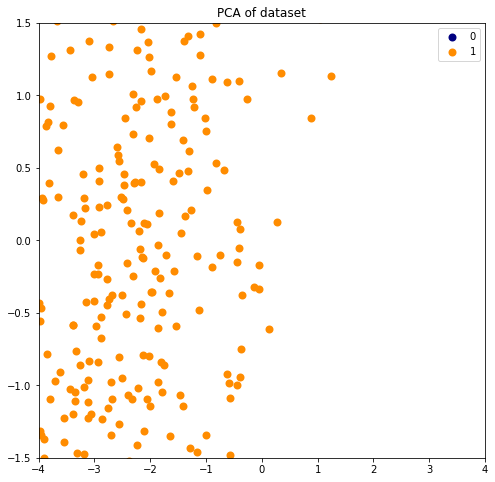

In [12]:
n_components = 7
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1], [0, 1]):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

## 4.

Quite  often,  in  real  high-dimensional  applications,  one  first  performs  PCA  to  reduce  the
dimensionality,  and  then  runs  prediction  on  the  reduced  data.   Run  a  PCA  to  reduce  the
original dimension (test a different number of components, e.g., 2, 5, 10, 20), and then try to
predict with

- Logisitc regression
- Support vector machines (use the rbf kernel)

In [13]:
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape, y.shape

((568, 5), (568,))

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_pca, y)
clf.predict(X_pca)
print('>> Predicted labels by logistic regression are:', clf.predict(X_pca))

clf.predict_proba(X_pca[:2, :]) 
clf.score(X_pca, y)
print(">> The mean accuracy of our data set is:", clf.score(X_pca,y))

>> Predicted labels by logistic regression are: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.
  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1.
  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.
 -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.
 -1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.
  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1.
  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.
  1

## 5.  Compare the LDA (Linear Discriminant Analysis) and the PCA. 
You can get inspiration from
the following example:
http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#
sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

explained variance ratio (first two components): [0.16061984 0.09729709 0.04733313 0.03961444 0.03635047]


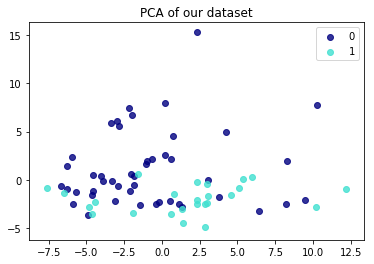

In [15]:
X = np.array(pd.read_csv("Golub_X",sep=" ").values) # Observations
y = np.array([x[0] for x in pd.read_csv("Golub_y",sep=" ").values]) # Classes

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of our dataset')
plt.show()

In [16]:
X = np.array(pd.read_csv("Golub_X",sep=" ").values) # Observations
y = np.array([x[0] for x in pd.read_csv("Golub_y",sep=" ").values]) # Classe

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

/home/amandine/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(71, 1)

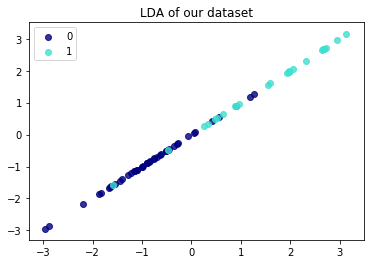

In [17]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 0], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of our dataset')

plt.show()

# Analysis on GOLUB dataset

## 1.  Perform PCA to cluster the observations
Note: fix the number of components = 2 in order to visualize the clustering in 2-D (or fix it to 3, and plot it in 3-D)
Here is a simple example how to do it

- For the Golub et al. 1999 data

In [18]:
X = np.array(pd.read_csv("Golub_X",sep=" ").values) # Observations
y = np.array([x[0] for x in pd.read_csv("Golub_y",sep=" ").values]) # Classes

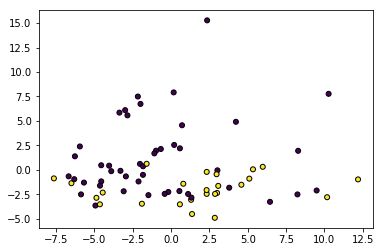

In [19]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1],marker="o", c=y,s=25, edgecolor="k")

A link to a more complex example (vizualisation in 3-D):
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

## 2.  Perform and visualize the results of the kernel PCA

http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

In [20]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

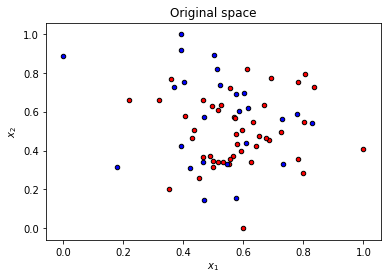

In [21]:
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [22]:
mesh, _ = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
mesh

array([[-1.5       , -1.43877551, -1.37755102, ...,  1.37755102,
         1.43877551,  1.5       ],
       [-1.5       , -1.43877551, -1.37755102, ...,  1.37755102,
         1.43877551,  1.5       ],
       [-1.5       , -1.43877551, -1.37755102, ...,  1.37755102,
         1.43877551,  1.5       ],
       ...,
       [-1.5       , -1.43877551, -1.37755102, ...,  1.37755102,
         1.43877551,  1.5       ],
       [-1.5       , -1.43877551, -1.37755102, ...,  1.37755102,
         1.43877551,  1.5       ],
       [-1.5       , -1.43877551, -1.37755102, ...,  1.37755102,
         1.43877551,  1.5       ]])

In [23]:
X_grid = np.array([np.ravel(mesh)] * 3562).T
X_grid.shape

(2500, 3562)

In [24]:
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(mesh.shape)

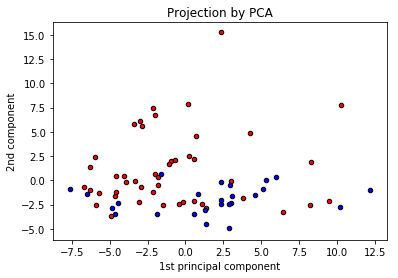

In [25]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.show()

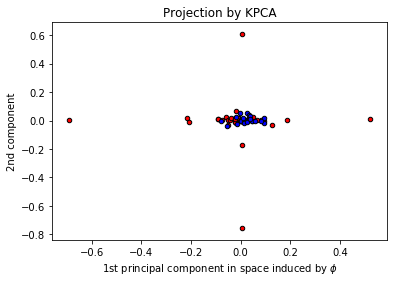

In [26]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.show()

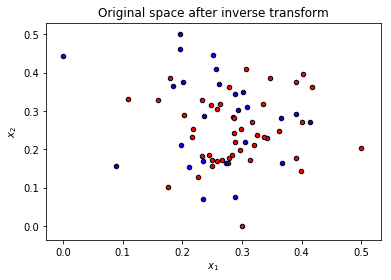

In [27]:
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## 3.  Test an incremental PCA which is used if a data set is too big to be fitted into the memory

https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html

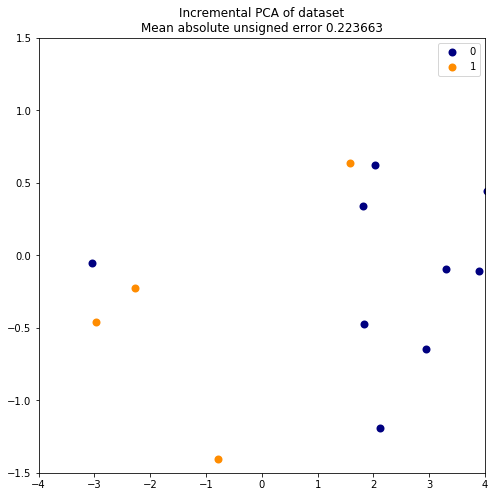

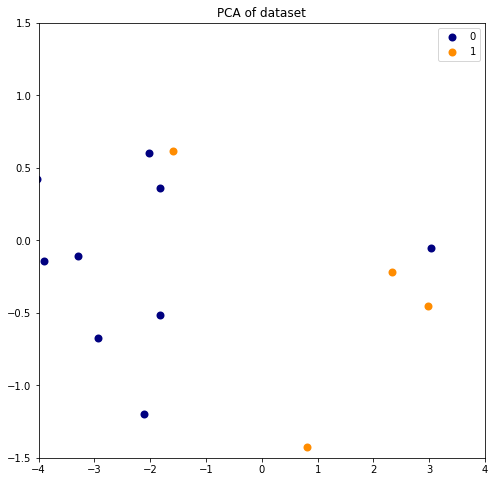

In [28]:
n_components = 7
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1], [0, 1]):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

## 4.

Quite  often,  in  real  high-dimensional  applications,  one  first  performs  PCA  to  reduce  the
dimensionality,  and  then  runs  prediction  on  the  reduced  data.   Run  a  PCA  to  reduce  the
original dimension (test a different number of components, e.g., 2, 5, 10, 20), and then try to
predict with

- Logisitc regression
- Support vector machines (use the rbf kernel)

In [29]:
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape, y.shape

((71, 5), (71,))

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_pca, y)
clf.predict(X_pca)
print('>> Predicted labels by logistic regression are:', clf.predict(X_pca))

clf.predict_proba(X_pca[:2, :]) 
clf.score(X_pca, y)
print(">> The mean accuracy of our data set is:", clf.score(X_pca,y))

>> Predicted labels by logistic regression are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
>> The mean accuracy of our data set is: 0.971830985915493


## 5.  Compare the LDA (Linear Discriminant Analysis) and the PCA. 
You can get inspiration from
the following example:
http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#
sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

explained variance ratio (first two components): [0.16061984 0.09729709 0.04733313 0.03961443 0.03635044]


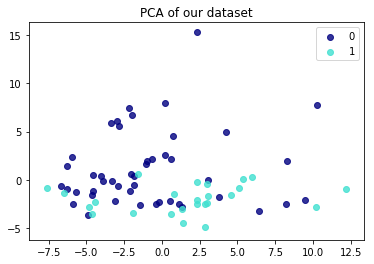

In [31]:
X = np.array(pd.read_csv("Golub_X",sep=" ").values) # Observations
y = np.array([x[0] for x in pd.read_csv("Golub_y",sep=" ").values]) # Classes

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of our dataset')
plt.show()

In [32]:
X = np.array(pd.read_csv("Golub_X",sep=" ").values) # Observations
y = np.array([x[0] for x in pd.read_csv("Golub_y",sep=" ").values]) # Classe

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

/home/amandine/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(71, 1)

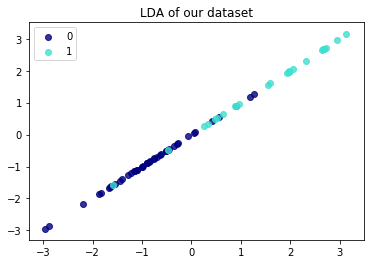

In [33]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 0], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of our dataset')

plt.show()

## 6.  Which data set is “easier” for prediction, i.e., in which data sets the classes are better separated?

We can observe that when the dataset has a curved shape such as Breast Cancer data rather than a hyperplane (suchas as Golub data), it is less easy for the PCA to predict the data.
Moreover, it seems that the number of data features influences the quality of the classification: data seem better separated when features number is higher.

## 7.  Was it useful to reduce the dimension of the original problems before running classification?
Are the error rates of the models learned from the reduced data smaller than ones from the
original (high-dimensional) data?

We have been able to see that it is relevant to use PCA to try to improve classification performance. It is quite logical given that it makes the work of of feature manipulation easier.

## References

A Tutorial on Principal Component Analysis https://arxiv.org/pdf/1404.1100.pdf